In [26]:
%load_ext autoreload
%autoreload 2

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [29]:
params = parse_experiment_params("../experiments_params/case_1.json")

In [30]:
results = get_experiment_mean_data(params, "../results/case_1/")

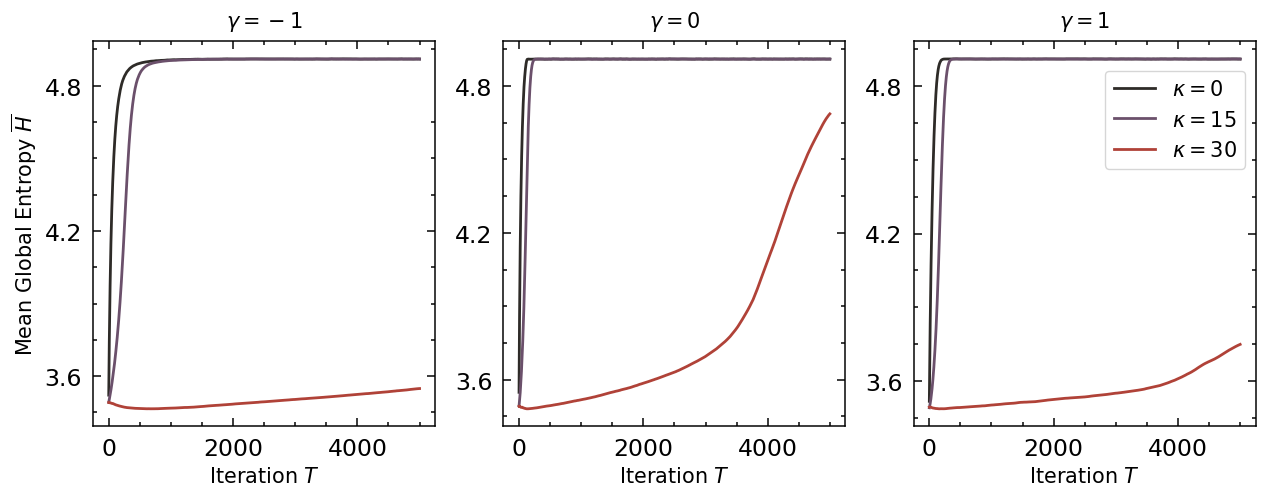

In [160]:
# parameters 

nrows = 1
ncols = 3

titles = [rf"$\gamma = {k}$" for k in [-1, 0, 1]]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Mean Global Entropy $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
        
# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)
    
# plot
line_width = 2

measure = 'entropy'

kappa_color = {
    0: "#2e2b28",
    15: "#6b506b",
    30: "#b04238"
}

X = np.arange(1, 5000 + 1)

selected_params = [x for x in params if x['gamma'] == -1]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width)
    
selected_params = [x for x in params if x['gamma'] == 0]
for p in selected_params:
    axs[1].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width)
    
selected_params = [x for x in params if x['gamma'] == 1]
for p in selected_params:
    axs[2].plot(X, results[make_tuple(p)][measure], c = kappa_color[p['kappa']], linewidth = line_width, label = rf"$\kappa = {p['kappa']}$")
axs[2].legend(loc = 'upper right', fontsize = 15, bbox_to_anchor = (1, 0.95))

In [ ]:
type(axs)